# Fourieroptik
### Jan A. Kesting

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as curve_fit
from scipy import odr
from scipy.integrate import quad

# Einzelspalt

#### Eichung

In [187]:
x=np.array([810,722,642,554,472])
y=np.array([1.66,1.41, 1.18, 0.95, 0.68])

x_err=np.zeros(5)+10 
y_err=np.zeros(5)+0.01

In [188]:
#Für die Gerade
def fit_func(p,x):
    return p[0]*x+p[1]
quad_model = odr.Model(fit_func)
data = odr.RealData(x, y, sx=x_err, sy=y_err)
out = odr.ODR(data, quad_model, beta0=[2., 1.]).run()
popt = out.beta
perr = out.sd_beta
m=popt[0]
b=popt[1]
delta_m=perr[0]
delta_b=perr[1]
print('Steigung:', m, 'Fehler:', delta_m)
print('Achsenabschnitt:', b, 'Fehler:', delta_b)

Steigung: 0.0028694191683439397 Fehler: 5.4948227993006774e-05
Achsenabschnitt: -0.6604282676786701 Fehler: 0.03577282176617724


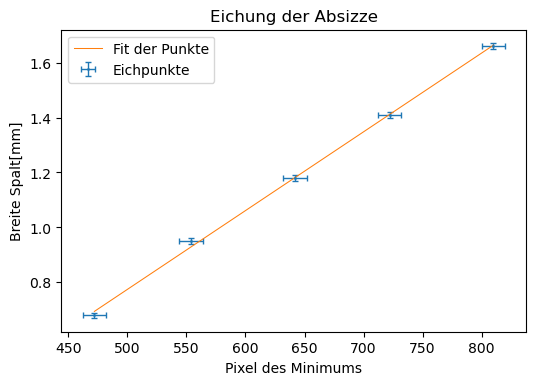

In [189]:
fig=plt.figure(dpi=100)
plt.errorbar(x,y, xerr=x_err, yerr=y_err, fmt='.', markersize=2, linewidth=1,capsize=2,label='Eichpunkte')
plt.plot(x, fit_func(popt, x), linewidth=0.75,label='Fit der Punkte')
plt.title('Eichung der Absizze')
plt.xlabel('Pixel des Minimums')
plt.ylabel('Breite Spalt[mm]')
plt.legend()
plt.savefig('233_4.pdf', format='PDF')

In [213]:
ordnung=np.arange(1,6,1)
maxi=np.array([774,687,602,519,438])
mini=np.array([810,722,642,554,472])

#maxi=np.array([438,519,602,687,774])
#mini=np.array([472,554,642,722,810])

err_pos=np.zeros(5)+10

quad_model = odr.Model(fit_func)
data = odr.RealData(ordnung, mini, sy=err_pos)
out = odr.ODR(data, quad_model, beta0=[2., 1.]).run()
popt_2 = out.beta
perr_2 = out.sd_beta
m_2=popt_2[0]
b_2=popt_2[1]
delta_m_2=perr_2[0]
delta_b_2=perr_2[1]
print('Steigung m:', m_2, 'Fehler:', delta_m_2)
print('Achsenabschnitt b:', b_2, 'Fehler:', delta_b_2)

Steigung m: -84.41682541664336 Fehler: 0.6929566476662021
Achsenabschnitt b: 893.2504761957903 Fehler: 2.298236104164254


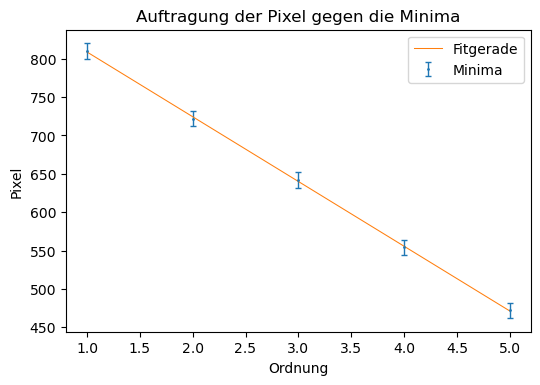

In [214]:
fig=plt.figure(dpi=100)
plt.errorbar(ordnung,mini, yerr=err_pos,fmt='.',markersize=2,linewidth=1,capsize=2, label='Minima')
plt.plot(ordnung,fit_func(popt_2, ordnung),linewidth=0.75, label='Fitgerade')
plt.xlabel('Ordnung')
plt.ylabel('Pixel')
plt.legend()
plt.title('Auftragung der Pixel gegen die Minima')
plt.savefig('233_5.pdf', format='PDF')

In [215]:
n=(maxi-b_2)/m_2
err_n=np.sqrt((err_pos/b_2)**2+(delta_b_2/m_2)**2+((n*delta_m_2)/m_2)**2)
print('Maxima n:', n)
print('Fehler von n:',err_n)

Maxima n: [1.41263872 2.44323895 3.45014723 4.43336354 5.3928879 ]
Fehler von n: [0.03163842 0.0356197  0.04084879 0.04680734 0.05316254]


In [216]:
print('Maxima n mit pi:',n*np.pi)
print('Fehler von n mit pi:',err_n*np.pi)

Maxima n mit pi: [ 4.43793542  7.67566155 10.83895718 13.92782234 16.942257  ]
Fehler von n mit pi: [0.09939503 0.11190259 0.12833027 0.14704961 0.16701504]


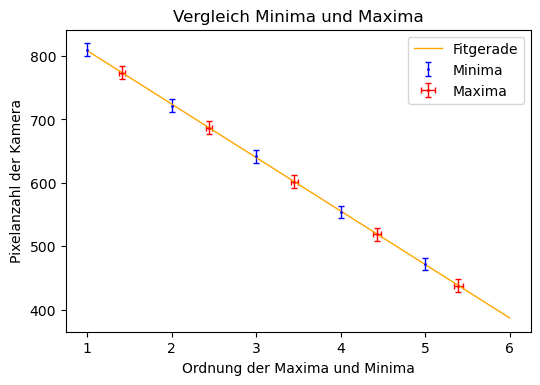

In [217]:
fig=plt.figure(dpi=100)
ordnung_2=np.arange(1,7,1)
plt.errorbar(ordnung,mini,yerr=err_pos, color='b',fmt='.',markersize=2,linewidth=1,capsize=2,label='Minima')
plt.errorbar(n,maxi,xerr=err_n,yerr=err_pos,color='r',fmt='.',markersize=2,linewidth=1,capsize=2,label='Maxima')
plt.plot(ordnung_2,fit_func(popt_2,ordnung_2),color='orange',linewidth=1,label='Fitgerade')
plt.xlabel('Ordnung der Maxima und Minima')
plt.ylabel('Pixelanzahl der Kamera')
plt.title('Vergleich Minima und Maxima')
plt.legend()
plt.savefig('233_6.pdf', format='PDF')

In [218]:
sinc_T=np.array([4.44,7.68,10.84,13.93,16.94]) #bestimmte Maxima
sigma=np.abs(sinc_T-(n*np.pi))/(err_n*np.pi)
print('Die Sigma-Umgebung der gemessenen Werte im Vergleich zur Theorie sind:',sigma)

Die Sigma-Umgebung der gemessenen Werte im Vergleich zur Theorie sind: [0.02077141 0.0387699  0.00812603 0.01480904 0.01351377]


#### Spaltbreite

In [219]:
lmbda= 635e-9
f=0.08

Steigung q= -4.12848445316994 Fehler: 0.03387537669031899


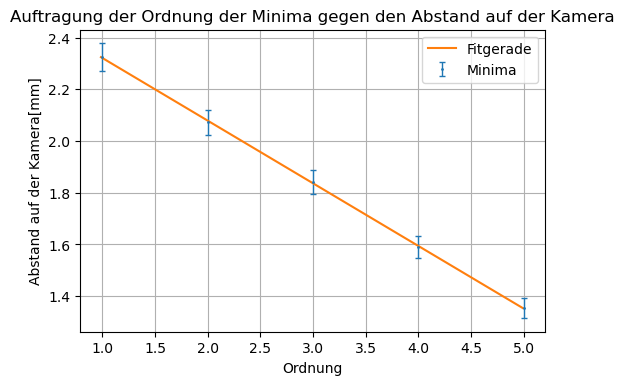

In [220]:
ordnung=np.arange(1,6,1)
mini_2=mini*m
err_pos_2=mini_2*np.sqrt((err_pos/mini)**2+(delta_m/m)**2)
quad_model = odr.Model(fit_func)
data = odr.RealData(mini_2,ordnung ,sx=err_pos_2)
out = odr.ODR(data, quad_model, beta0=[2., 1.]).run()
popt_3 = out.beta
perr_3 = out.sd_beta
m_3=popt_3[0]
b_3=popt_3[1]
delta_m_3=perr_3[0]
delta_b_2=perr_3[1]
fig=plt.figure(dpi=100)
plt.errorbar( ordnung,mini_2, yerr=err_pos_2,fmt='.',markersize=2,linewidth=1,capsize=2,label='Minima')
plt.plot(fit_func(popt_3,mini_2),mini_2,label='Fitgerade')
plt.xlabel('Ordnung')
plt.ylabel('Abstand auf der Kamera[mm]')
plt.title('Auftragung der Ordnung der Minima gegen den Abstand auf der Kamera')
plt.grid()
plt.savefig('233_7.pdf', format='PDF')
plt.legend()
print('Steigung q=', m_3, 'Fehler:', delta_m_3 )

In [221]:
d=lmbda*f*-m_3
delta_d=Wellel*f*delta_m_3
print('Spaltbreite d=(',d, '+-',delta_d,')m')

Spaltbreite d=( 2.0972701022103295e-07 +- 1.7208691358682045e-09 )m


#### Intensitätsverhältnis

In [227]:
I_1=np.array([3680,374]) #Max. 0. und 1. Ordnung bei geringer Intensität (b.E.)
#I_2=np.array([239,348,567,1147,3130])
I_2=np.array([3130,1147,567,348,239])
err_I=10
u_I_1=93
u_I_2=99
err_u_I=10
I_1_c=I_1-u_I_1
I_2_c=I_2-u_I_2
err_I_c=np.sqrt(5**2+10**2)

In [228]:
v_0=1
delta_v_0=v_0*np.sqrt(2*(err_I_c/I_1_c[0])**2)
v_1=I_1_c[1]/I_1_c[0]
delta_v_1=v_1*np.sqrt((err_I_c/I_1_c[1])**2+(err_I_c/I_1_c[0])**2)
print('Verhältnis 1 zu 0:', v_1, 'Fehler:', delta_v_1)

Verhältnis 1 zu 0: 0.07833844438249234 Fehler: 0.0031264549191112427


In [229]:
v_2=v_1*(I_2_c[1]/I_2_c[0])
delta_v_2=v_2*np.sqrt((delta_v_1/v_1)**2+(err_I_c/I_2_c[1])**2+(err_I_c/I_1_c[1])**2)

v_3=v_1*(I_2_c[2]/I_2_c[0])
delta_v_3=v_3*np.sqrt((delta_v_1/v_1)**2+(err_I_c/I_2_c[2])**2+(err_I_c/I_1_c[1])**2)

v_4=v_1*(I_2_c[3]/I_2_c[0])
delta_v_4=v_4*np.sqrt((delta_v_1/v_1)**2+(err_I_c/I_2_c[3])**2+(err_I_c/I_1_c[1])**2)

v_5=v_1*(I_2_c[4]/I_2_c[0])
delta_v_5=v_5*np.sqrt((delta_v_1/v_1)**2+(err_I_c/I_2_c[4])**2+(err_I_c/I_1_c[1])**2)

v_i0=np.array([v_0, v_1, v_2, v_3, v_4, v_5])
delta_v_i0=np.array([delta_v_0, delta_v_1, delta_v_2, delta_v_3,delta_v_4,delta_v_5])

#v_i0=np.array([v_5, v_4, v_3, v_2, v_1, v_0])
#delta_v_i0=np.array([delta_v_5, delta_v_4, delta_v_3, delta_v_2,delta_v_1,delta_v_0])

Theoretische der sinc$^2$.Funktion: [ -0.          -4.43793542  -7.67566155 -10.83895718 -13.92782234
 -16.942257  ]


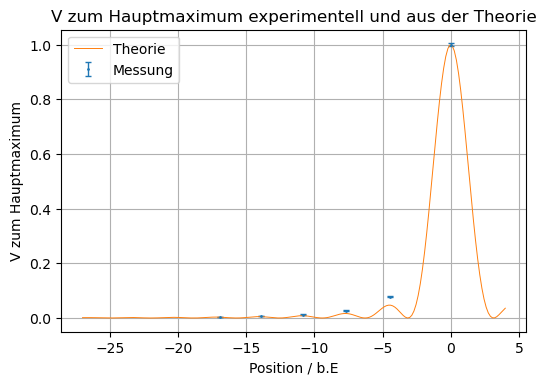

In [233]:
fig=plt.figure(dpi=100)
maxima=-np.append([0],n*np.pi)
plt.errorbar(maxima, v_i0, yerr=delta_v_i0, fmt='.',markersize=2, linewidth=1, capsize=2, label='Messung')
x=np.linspace(-27,4,200)
plt.plot(x, np.sinc(x/np.pi)**2, label = "Theorie", linewidth=0.7)
plt.legend()
plt.title('V zum Hauptmaximum experimentell und aus der Theorie')
plt.ylabel('V zum Hauptmaximum')
plt.xlabel('Position / b.E')
plt.grid()
plt.savefig('233_8.pdf', format='PDF')
print('Theoretische der sinc$^2$.Funktion:', maxima)

In [234]:
theo = np.sinc(maxima/np.pi)**2
print('Theo:',theo)
print('Messung:',v_i0)
print('Fehler:',delta_v_i0)
print('Sigma(Maxima ab 0. Ordnung):',np.abs(theo-v_i0)/delta_v_i0)

Theo: [1.         0.04704417 0.01643936 0.00830478 0.00493242 0.00310401]
Messung: [1.         0.07833844 0.02708634 0.01209581 0.00643559 0.0036184 ]
Fehler: [0.00440797 0.00312645 0.00155355 0.00074037 0.00046372 0.00035367]
Sigma(Betrachte Betrag): [ 0.         10.00950834  6.8533281   5.12042249  3.24157293  1.45444726]


# Doppelspalt

In [271]:
#aus versuchsteil 4 zu entnehmen
d=1116-789 #pixel
b_1=854-727
b_2=1179-1049
b=(b_1+b_2)/2
err_b=5
err_d=np.sqrt(2*(5**2)) #5 entspricht unserem Ablesefehler bei den pixeln
v=d/b
delta_v=v*np.sqrt((err_d/d)**2+(err_b/b)**2)
print('Das Verhältnis beträgt',v,'+-',delta_v)

Das Verhältnis beträgt 2.544747081712062 +- 0.11328062356071988
327


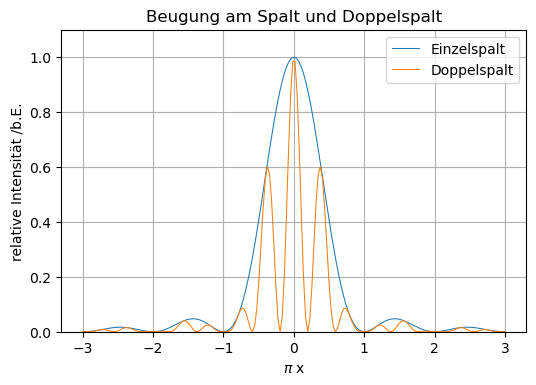

In [257]:
def beugung_spalt(x):
    return np.sinc(x)**2
def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2
a=1
x=np.linspace(-(a+2),a+2,200)
fig=plt.figure(dpi=100)
plt.plot(x,beugung_spalt(x),label='Einzelspalt',linewidth=0.75)
plt.plot(x,beugung_doppelspalt(x),label='Doppelspalt',linewidth=0.75)
plt.xlabel('$\pi$ x')
plt.ylabel('relative Intensität /b.E.')
plt.title('Beugung am Spalt und Doppelspalt')
plt.ylim((0,1.1))
plt.legend()
plt.grid()
plt.savefig('233_13.pdf', format='PDF')

In [258]:
I_1=np.array([3360,2370,500])
I_2=np.array([2750,905,935,220])
delta_I=10
ug_1=90
ug_2=89
delta_ug=10
I_1_c=I_1-ug_1
I_2_c=I_2-ug_2
delta_I_c=np.sqrt((delta_I)**2+(delta_ug)**2)

In [259]:
v_0=1
v_0_err=v_0*np.sqrt(2*(delta_I_c/I_1_c[0])**2)

v_1=I_1_c[1]/I_1_c[0]
v_1_err=v_1*np.sqrt((delta_I_c/I_1_c[0])**2+(delta_I_c/I_1_c[1])**2)

v_2=I_1_c[2]/I_1_c[0]
v_2_err=v_2*np.sqrt((delta_I_c/I_1_c[0])**2+(delta_I_c/I_1_c[2])**2)

v_3=(I_2_c[1]/I_2_c[0])*v_2
v_3_err=v_2*np.sqrt((delta_I_c/I_2_c[1])**2+(delta_I_c/I_2_c[0])**2+(v_2_err/v_2)**2)

v_4=(I_2_c[2]/I_2_c[0])*v_2
v_4_err=v_3*np.sqrt((delta_I_c/I_2_c[2])**2+(delta_I_c/I_2_c[0])**2+(v_2_err/v_2)**2)

v_5=(I_2_c[3]/I_2_c[0])*v_2
v_5_err=v_3*np.sqrt((delta_I_c/I_2_c[3])**2+(delta_I_c/I_2_c[0])**2+(v_2_err/v_2)**2)

v_i0=np.array([v_0, v_1, v_2, v_3, v_4, v_5])
delta_v_i0=np.array([delta_v_0, delta_v_1, delta_v_2, delta_v_3, delta_v_4, delta_v_5])

print('Messung:',v_i0)
print('Fehler', delta_v_i0)
#print(np.sinc(I_2/np.pi)**2)

Messung: [1.         0.69724771 0.12538226 0.03844868 0.03986223 0.00617252]
Fehler [0.00440797 0.00312645 0.00155355 0.00074037 0.00046372 0.00035367]


# Einzelspalt (Fourierbild)

In [260]:
B=1106-983 #(Pixel)Spaltgröße
err_B=np.sqrt(5**2 + 5**2)
f=80 #Brennweite
b=690 #Bildweite
err_b=5 
G=B/((b/f)-1)
err_G=G * np.sqrt((err_B/B)**2+(err_b/b)**2)
print(G)
print(err_G)

16.131147540983605
0.9346912336602851


In [262]:
#Ein Pixel entspricht 14 \mu m
G_real=14*G
err_G_real=14*err_G
print('Spaltbreite G:', G_real)
print('Fehler:', err_G_real)

Spaltbreite G: 225.83606557377047
Fehler: 13.085677271243991


In [263]:
#Intensitätsvergleich
I_0=3500
I_1=np.array([3515,2757,3515]) #Spiegeln!
I_2=np.array([3479,2973,3296,2973,3479])
I_3=np.array([3432,3014,3318,2959,3318,3014,3432])
err_I=20
ug=93
err_ug=10
I_0_c=I_0-ug
I_1_c=I_1-ug
I_2_c=I_2-ug
I_3_c=I_3-ug
err_I_c=np.sqrt((err_I)**2+(err_ug)**2)

In [264]:
rel_1=I_1/I_0
rel_2=I_2/I_0
rel_3=I_3/I_0
err_rel_1=rel_1*np.sqrt((err_I_c/I_1_c)**2+(err_I_c/I_0)**2)
err_rel_2=rel_2*np.sqrt((err_I_c/I_2_c)**2+(err_I_c/I_0)**2)
err_rel_3=rel_3*np.sqrt((err_I_c/I_3_c)**2+(err_I_c/I_0)**2)
print('Vergleich 1. Ordnung mit 0.:', rel_1)
print('Fehler:', err_rel_1)
print('Vergleich 1. und 2. Ordnung mit 0.:', rel_2)
print('Fehler:', err_rel_2)
print('Vergleich 1., 2. und 3. Ordnung mit 0.:', rel_3)
print('Fehler:', err_rel_3)

Vergleich 1. Ordnung mit 0.: [1.00428571 0.78771429 1.00428571]
Fehler: [0.0091778  0.00830916 0.0091778 ]
Vergleich 1. und 2. Ordnung mit 0.: [0.994      0.84942857 0.94171429 0.84942857 0.994     ]
Fehler: [0.0091333  0.00854079 0.00891167 0.00854079 0.0091333 ]
Vergleich 1., 2. und 3. Ordnung mit 0.: [0.98057143 0.86114286 0.948      0.84542857 0.948      0.86114286
 0.98057143]
Fehler: [0.00907565 0.00858631 0.0089379  0.00852536 0.0089379  0.00858631
 0.00907565]


In [267]:
#theoretische Werte
def spalt(k,y):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)
d=1 #Spaltbreite auf 1 setzen
n=1 #Integrationsbereich
p=1.38976 #maximale Intensität bei 0. Beugungsordnung
Y=np.linspace(-1,1,200)*d
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append((result**2)/p)

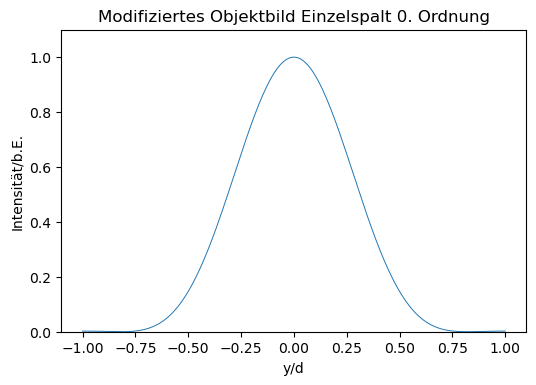

In [268]:
fig=plt.figure(dpi=100)
plt.plot(Y,f_modifiziert,linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensität/b.E.')
plt.title('Modifiziertes Objektbild Einzelspalt 0. Ordnung',)
plt.ylim((0,1.1))
plt.savefig('233_19.pdf', format='PDF')

In [107]:
d=1 #Spaltbreite auf 1 setzen
n=2 #Integrationsbereich
Y=np.linspace(-1,1,200)*d
p= 1.38976 #maximale Intensität bei 0. Beugungsordnung
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append((result**2)/p)

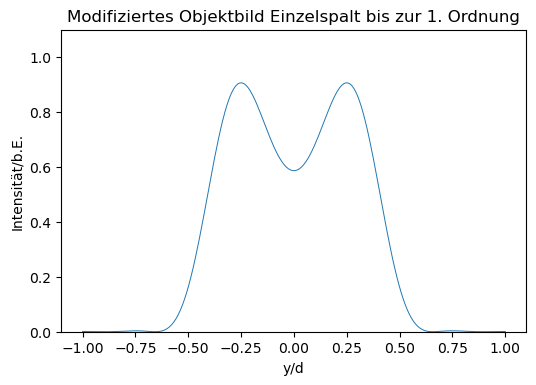

In [108]:
fig=plt.figure(dpi=100)
plt.plot(Y,f_modifiziert,linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensität/b.E.')
plt.title('Modifiziertes Objektbild Einzelspalt bis zur 1. Ordnung',)
plt.ylim((0,1.1))
plt.savefig('233_20.pdf', format='PDF')

In [109]:
d=1 #Spaltbreite auf 1 setzen
n=3 #Integrationsbereich
Y=np.linspace(-1,1,200)*d
p= 1.38976 #maximale Intensität bei 0. Beugungsordnung
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append((result**2)/p)

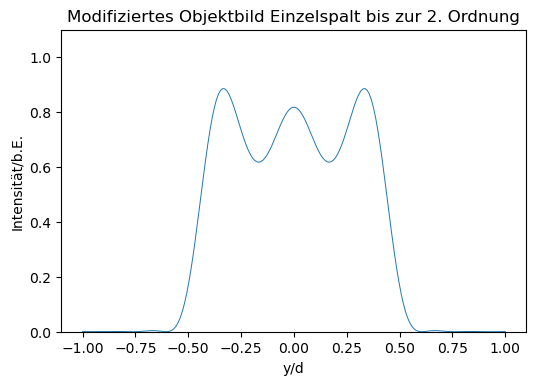

In [110]:
fig=plt.figure(dpi=100)
plt.plot(Y,f_modifiziert,linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensität/b.E.')
plt.title('Modifiziertes Objektbild Einzelspalt bis zur 2. Ordnung',)
plt.ylim((0,1.1))
plt.savefig('233_21.pdf', format='PDF')

In [111]:
d=1 #Spaltbreite auf 1 setzen
n=4 #Integrationsbereich
Y=np.linspace(-1,1,200)*d
p= 1.38976 #maximale Intensität bei 0. Beugungsordnung
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append((result**2)/p)

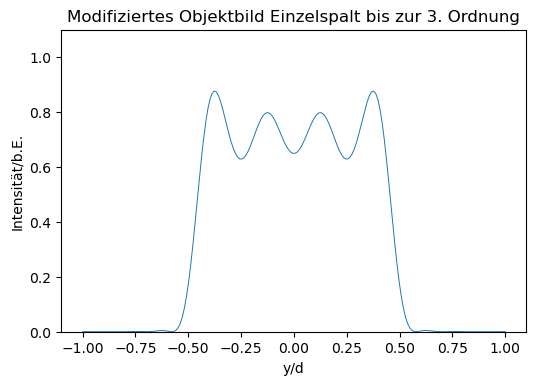

In [112]:
fig=plt.figure(dpi=100)
plt.plot(Y,f_modifiziert,linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensität/b.E.')
plt.title('Modifiziertes Objektbild Einzelspalt bis zur 3. Ordnung',)
plt.ylim((0,1.1))
plt.savefig('233_29.pdf', format='PDF')

In [113]:
d=1 #Spaltbreite auf 1 setzen
n=15 #Integrationsbereich
Y=np.linspace(-1,1,200)*d
p= 1.38976 #maximale Intensität bei 0. Beugungsordnung
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append((result**2)/p)

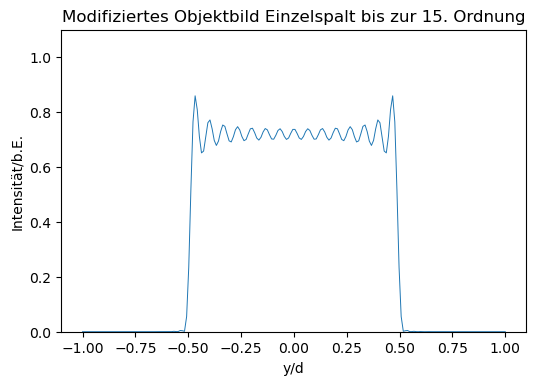

In [114]:
fig=plt.figure(dpi=100)
plt.plot(Y,f_modifiziert,linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensität/b.E.')
plt.title('Modifiziertes Objektbild Einzelspalt bis zur 15. Ordnung',)
plt.ylim((0,1.1))
plt.savefig('233_30.pdf', format='PDF')

# Doppelspalt (Fourierbild)

In [302]:
#Spaltbreite
B_1=854-727
B_2=1179-1049
B=(B_1+B_2)/2
delta_B=5 

b=690 #Bildweite mm
delta_b=5

f=80

G=B/((b/f)-1)
delta_G=np.sqrt((delta_B/((b/f)-1))**2+(((B/f)*delta_b)/(((b/f)-1)**2))**2)
scale=14
G_real=scale*G
delta_G_real=scale*delta_G
print('Spaltbreite:', G_real)
print('Fehler:', delta_G_real)
spaltbreite=G_real
delta_spaltbreite=delta_G_real

Spaltbreite: 235.9344262295082
Fehler: 9.381809283753702


In [303]:
# Berechnung für den Spaltmittenabstand
B=d 
Delta_B=err_d

b=690 #Bildweite mm
delta_b=5

f=80

G=B/((b/f)-1)
delta_G=(Delta_B/((b/f)-1))

G_real=14*G
delta_G_real=scale*delta_G
print('Spaltmittenabstand:', G_real)
print('Fehler:', delta_G_real)

Spaltmittenabstand: 0.43331147540983606
Fehler: 12.98294417916284


In [304]:
def doppelspalt(k,y):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

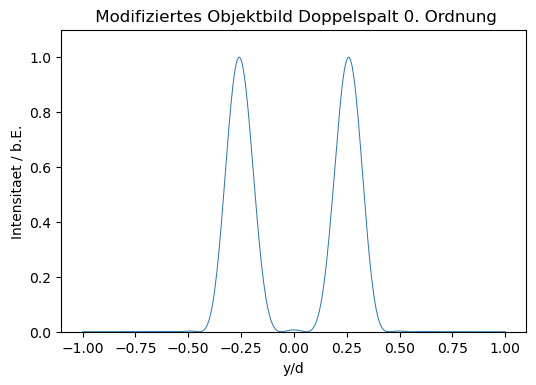

In [305]:
d=0.236 #Spaltbreite
g=2.177*d
n=1
Y=np.linspace(-1,1,400)
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append(result**2)
    
f_modifiziert=f_modifiziert/np.max(f_modifiziert)
fig=plt.figure(dpi=100)
plt.plot(Y, f_modifiziert, linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensitaet / b.E.')
plt.title(' Modifiziertes Objektbild Doppelspalt 0. Ordnung')
plt.ylim((0,1.1))
plt.savefig('233_24.pdf', format='PDF')

<ipython-input-306-d0f273f090e7>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(doppelspalt, 0, 2*np.pi*n/d, args=(y,))


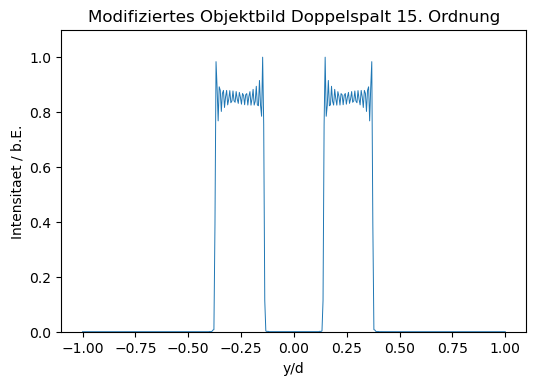

In [306]:
d=0.236
g=2.177*d
n=15
Y=np.linspace(-1,1,400)
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append(result**2)
    
f_modifiziert=f_modifiziert/np.max(f_modifiziert)
fig=plt.figure(dpi=100)
plt.plot(Y, f_modifiziert, linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensitaet / b.E.')
plt.title('Modifiziertes Objektbild Doppelspalt 15. Ordnung')
plt.ylim((0,1.1))
plt.savefig('233_25.pdf', format='PDF')

n wurde abgeschätzt auf n= 0.31 mit einem Fehler von 0.002


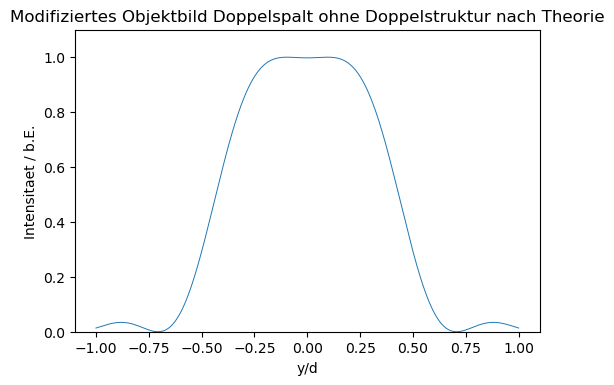

In [307]:
d=0.236
g=2.177*d
n=0.31
Y=np.linspace(-1,1,400)
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, 2*np.pi*n/d, args=(y,))
    f_modifiziert.append(result**2)
    
f_modifiziert=f_modifiziert/np.max(f_modifiziert)
fig=plt.figure(dpi=100)
plt.plot(Y, f_modifiziert, linewidth=0.7)
plt.xlabel('y/d')
plt.ylabel('Intensitaet / b.E.')
plt.title('Modifiziertes Objektbild Doppelspalt ohne Doppelstruktur nach Theorie')
plt.ylim((0,1.1))
plt.savefig('233_27.pdf', format='PDF')
print('n wurde abgeschätzt auf n=',n, 'mit einem Fehler von 0.002' )

In [301]:
n=0.31
delta_n=0.002
k_yb=2*n*np.pi/(spaltbreite*10**(-6))
k_ya=2*np.pi/(spaltbreite*10**(-6))
delta_k_yb=k_yb*np.sqrt((delta_n/n)**2+(delta_spaltbreite/spaltbreite)**2)
delta_k_ya=k_ya*np.sqrt((0/n)**2+(delta_spaltbreite/spaltbreite)**2)
print('Theoretisches k_yb:', k_yb, 'Fehler:', delta_k_yb)
print('Theoretisches k_ya:',k_ya, 'Fehler:', delta_k_ya)

Theoretisches k_yb: 8255.63050019219 Fehler: 332.57354455166706
Theoretisches k_ya: 26631.066129652223 Fehler: 1058.9704412546714
